# O que este notebook faz:


* Gera datasets sintéticos de classificação e agrupamento.
* Mede o tempo de treino e predição de cada algoritmo.


* Monitora o uso de memória durante as execuções.
* Cria gráficos comparativos para visualizar como o custo computacional cresce com o tamanho dos dados.



In [2]:
!pip install memory_profiler



 Testando LogisticRegression...

 Testando KMeans...

 Testando RandomForestClassifier...


,Algoritmo,Amostras,Tempo Treino (s),Tempo Predição (s),Memória Treino (MB),Memória Predição (MB)
0,LogisticRegression,1000,0.046157,0.029127,0.011719,0.003906
1,LogisticRegression,5000,0.042970,0.021935,0.003906,0.003906
2,LogisticRegression,10000,0.049343,0.022540,0.003906,0.003906
3,LogisticRegression,20000,0.070157,0.026570,0.003906,0.003906
4,LogisticRegression,50000,0.294038,0.044384,0.011719,0.003906
5,KMeans,1000,0.075126,0.038890,0.000000,0.000000
6,KMeans,5000,0.103025,0.037031,0.000000,0.000000
7,KMeans,10000,0.079884,0.043400,0.000000,0.000000
8,KMeans,20000,0.177987,0.040397,0.003906,0.003906
9,KMeans,50000,0.286931,0.044252,0.003906,0.003906


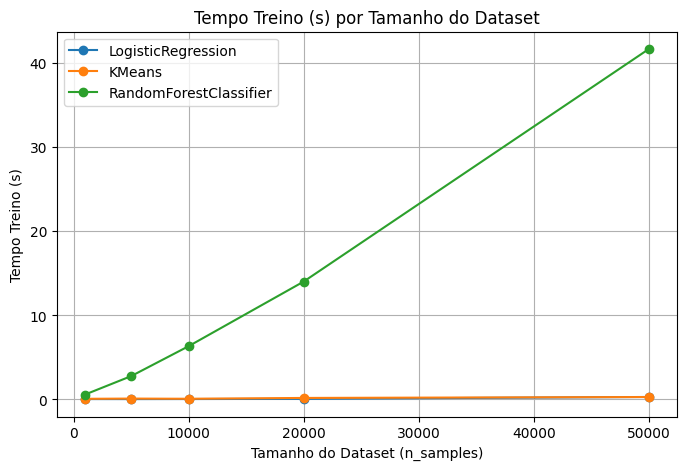

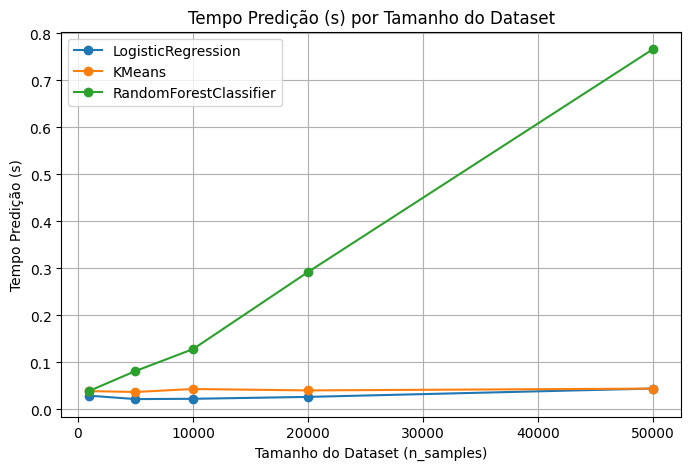

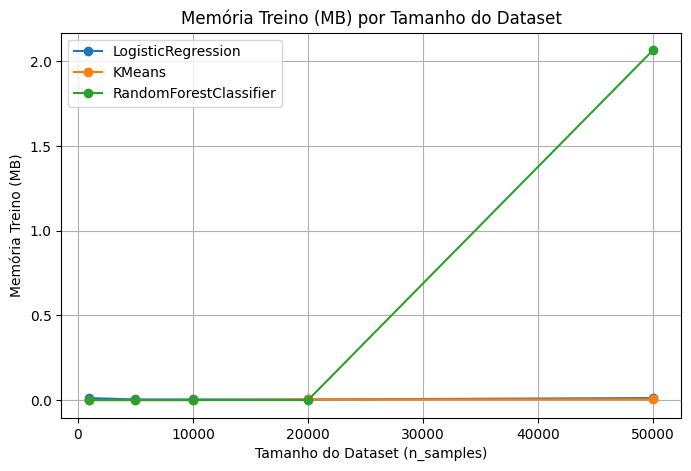

In [4]:
# Benchmark de algoritmos do scikit-learn
# Avalia tempo e uso de memória em função do tamanho do dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from memory_profiler import memory_usage

# Configurações gerais
np.random.seed(42)
dataset_sizes = [1000, 5000, 10000, 20000, 50000]

# Algoritmos a serem testados
algorithms = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KMeans": KMeans(n_clusters=3, n_init=10),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100)
}

# Tabelas para armazenar resultados
results = []

# Loop principal de benchmark
for name, model in algorithms.items():
    print(f"\n Testando {name}...")
    for n in dataset_sizes:
        # Geração do dataset
        if name == "KMeans":
            X, _ = make_blobs(n_samples=n, n_features=10, centers=3)
            y = None
        else:
            X, y = make_classification(n_samples=n, n_features=20, n_informative=10, n_classes=2)

        # Medir tempo e memória de treino
        start_time = time.time()
        mem_usage_train = memory_usage((model.fit, (X, y)), max_iterations=1)
        train_time = time.time() - start_time

        # Medir tempo e memória de predição (quando aplicável)
        if hasattr(model, "predict"):
            start_time = time.time()
            mem_usage_pred = memory_usage((model.predict, (X,)), max_iterations=1)
            pred_time = time.time() - start_time
        else:
            pred_time = np.nan
            mem_usage_pred = mem_usage_train

        # Armazenar resultados
        results.append({
            "Algoritmo": name,
            "Amostras": n,
            "Tempo Treino (s)": train_time,
            "Tempo Predição (s)": pred_time,
            "Memória Treino (MB)": max(mem_usage_train) - min(mem_usage_train),
            "Memória Predição (MB)": max(mem_usage_pred) - min(mem_usage_pred)
        })

# Exibir resultados em tabela
df_results = pd.DataFrame(results)
display(df_results)

# Gráficos comparativos
for metric in ["Tempo Treino (s)", "Tempo Predição (s)", "Memória Treino (MB)"]:
    plt.figure(figsize=(8,5))
    for alg in df_results["Algoritmo"].unique():
        subset = df_results[df_results["Algoritmo"] == alg]
        plt.plot(subset["Amostras"], subset[metric], marker="o", label=alg)
    plt.xlabel("Tamanho do Dataset (n_samples)")
    plt.ylabel(metric)
    plt.title(metric + " por Tamanho do Dataset")
    plt.legend()
    plt.grid(True)
    plt.show()


# Interpretação dos Resultados

Os testes comparativos entre LogisticRegression, KMeans e RandomForestClassifier mostraram que:



*  **LogisticRegression** apresentou o melhor desempenho geral, com tempos baixos e uso mínimo de memória.
* **KMeans** manteve boa escalabilidade e estabilidade de tempo, mesmo com aumento do dataset.
* **RandomForestClassifier** teve maior custo computacional, com tempo e memória crescendo linearmente conforme o número de amostras.

Em resumo, algoritmos lineares e de clustering simples são mais eficientes em datasets grandes, enquanto modelos de ensemble oferecem maior robustez ao custo de desempenho.



